## 1. Import Libraries needed

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import median, mode

## 2. Import CCS data and NaN trend data to test autoencoder with 

In [4]:
daily_trend = pd.read_csv('trends from matched - cleaned/daily_trend.csv')
daily_trendln = pd.read_csv('trends from matched - cleaned/daily_trendln.csv')
hourly_trend = pd.read_csv('trends from matched - cleaned/hourly_trend.csv')
hourly_trendln = pd.read_csv('trends from matched - cleaned/hourly_trendln.csv')

In [5]:
def import_ccs(filepath):
    scaler = MinMaxScaler()
    ccs = pd.read_csv(filepath, parse_dates=['Time'], low_memory=False)
    ccs = ccs[['Time','Direction', 'Volume']]
    ccs = ccs.loc[ccs['Direction']=='S']
    ccs['#_lane'] = 4
    ccs['hour'] = ccs['Time'].dt.hour
    ccs['day'] = ccs['Time'].dt.dayofweek
    ccs['Volume'] = scaler.fit_transform(ccs[['Volume']])
    ccs = ccs[['Time','Volume','day','hour','#_lane']]
    ccs.reset_index(inplace=True, drop=True)
    return ccs

In [6]:
filepath= r'D:\OneDrive - University of Georgia/CCS_Data/Directional/089-3354.csv'
ccs = import_ccs(filepath)

In [7]:
ccstest = ccs.copy()

### Extract daily volumes

In [8]:
# Convert the 'timestamp' column to a datetime index
ccstest.index = pd.to_datetime(ccstest['Time'])

# Initialize a dictionary to store the daily data
daily_ccs = {}

# Extract the unique dates from the datetime index
dates = np.unique(ccstest.index.date)

# Extract the daily readings using a loop
for date in dates:
  daily_ccs[date] = ccstest[ccstest.index.date == date]
  
# Check the number of rows in each daily dataframe
for date, df_day in daily_ccs.items():
  print(f'{date}: {df_day.shape[0]} rows')

2018-08-01: 288 rows
2018-08-02: 288 rows
2018-08-03: 288 rows
2018-08-04: 288 rows
2018-08-05: 288 rows
2018-08-06: 288 rows
2018-08-07: 288 rows
2018-08-08: 288 rows
2018-08-09: 288 rows
2018-08-10: 288 rows
2018-08-11: 288 rows
2018-08-12: 288 rows
2018-08-13: 288 rows
2018-08-14: 288 rows
2018-08-15: 288 rows
2018-08-16: 288 rows
2018-08-17: 288 rows
2018-08-18: 288 rows
2018-08-19: 288 rows
2018-08-20: 288 rows
2018-08-21: 288 rows
2018-08-22: 288 rows
2018-08-23: 288 rows
2018-08-24: 288 rows
2018-08-25: 288 rows
2018-08-26: 288 rows
2018-08-27: 288 rows
2018-08-28: 288 rows
2018-08-29: 288 rows
2018-08-30: 288 rows
2018-08-31: 288 rows
2018-09-01: 288 rows
2018-09-02: 288 rows
2018-09-03: 288 rows
2018-09-04: 288 rows
2018-09-05: 288 rows
2018-09-06: 288 rows
2018-09-07: 288 rows
2018-09-08: 288 rows
2018-09-09: 288 rows
2018-09-10: 288 rows
2018-09-11: 288 rows
2018-09-12: 288 rows
2018-09-13: 288 rows
2018-09-14: 288 rows
2018-09-15: 288 rows
2018-09-16: 288 rows
2018-09-17: 2

In [9]:
day = datetime.date(2019, 4, 17)
df_apr_17 = daily_ccs[day]

In [10]:
df_apr_17

,Time,Volume,day,hour,#_lane
Time,,,,,
2019-04-17 00:00:00,2019-04-17 00:00:00,0.216438,2,0,4
2019-04-17 00:05:00,2019-04-17 00:05:00,0.183562,2,0,4
2019-04-17 00:10:00,2019-04-17 00:10:00,0.206849,2,0,4
2019-04-17 00:15:00,2019-04-17 00:15:00,0.194521,2,0,4
2019-04-17 00:20:00,2019-04-17 00:20:00,0.186301,2,0,4
...,...,...,...,...,...
2019-04-17 23:35:00,2019-04-17 23:35:00,0.283562,2,23,4
2019-04-17 23:40:00,2019-04-17 23:40:00,0.284932,2,23,4
2019-04-17 23:45:00,2019-04-17 23:45:00,0.279452,2,23,4


### Calculating the number of missing values

### Plot each day

Text(0.5, 1.0, '2019-4-17')

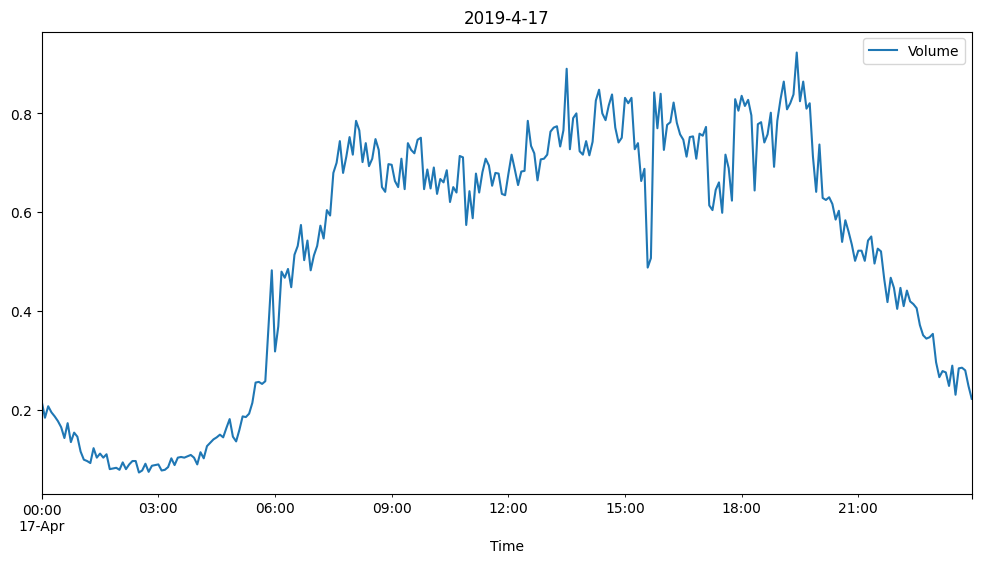

In [11]:
df_apr_17.plot(x='Time',y='Volume', figsize=(12,6))
plt.title('2019-4-17')

In [45]:
hourly_trend.loc[hourly_trend['hour'] == hour, '%_missing']

NameError: name 'hour' is not defined

In [19]:
hourlist = []
for hour in df_oct_10.hour.unique():
    hourlymissing = hourly_trend.loc[hourly_trend['hour'] == hour, '%_missing'].values
    hourmask = np.random.rand(12).round(2) < hourlymissing
    for j in hourmask:
        hourlist.append(j)

NameError: name 'df_oct_10' is not defined

In [162]:
pd.DataFrame(hourlist)

,0
0,True
1,True
2,False
3,False
4,True
...,...
283,False
284,True
285,False
286,True


In [173]:
df_oct_10['Volume'].values.size

288

## 3. Mask Data 

In [12]:
for date in daily_ccs:
    ccs = daily_ccs[date]
    day = date.weekday()
    lane = ccs['#_lane'][0]
    dailymissing = daily_trend.loc[daily_trend['day'] == day, '%_missing'].values
    dailylnmissing = daily_trendln.loc[daily_trendln['#_lane'] == lane, '%_missing'].values
    # hourlylnmissing = hourly_trendln.loc[hourly_trendln['#_lane'] == lane, '%_missing'].values
    dailymask = np.random.rand(288).round(2) < dailymissing
    dailylnmask = np.random.rand(288).round(2) < dailylnmissing
    # hourlylnmask = np.random.rand(288).round(2) < hourlymissing                                
    # hourlymask = []
    # for hour in ccs.hour.unique():
    #     hourlymissing = hourly_trend.loc[hourly_trend['hour'] == hour, '%_missing'].values
    #     hourmask = np.random.rand(12).round(2) < hourlymissing
    #     for j in hourmask:
    #         hourlymask.append(j)
                                         
    finalmask = (dailymask | dailylnmask) #| (hourlymask & hourlylnmask)
    maskedccs = np.where(finalmask, -1, ccs['Volume'].values)
    break

In [13]:
maskedccs

array([-1.        ,  0.19315068, -1.        , -1.        , -1.        ,
       -1.        , -1.        ,  0.15890411, -1.        , -1.        ,
        0.1260274 , -1.        ,  0.11369863, -1.        , -1.        ,
        0.13150685, -1.        , -1.        ,  0.06986301, -1.        ,
        0.1       , -1.        , -1.        ,  0.09863014,  0.07808219,
        0.07534247, -1.        ,  0.06849315, -1.        , -1.        ,
        0.08767123, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        ,  0.0630137 , -1.        , -1.        ,
       -1.        ,  0.08219178, -1.        , -1.        , -1.        ,
       -1.        ,  0.08493151, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  0.24109589,
       -1.        ,  0.23150685, -1.        , -1.        , -1.  

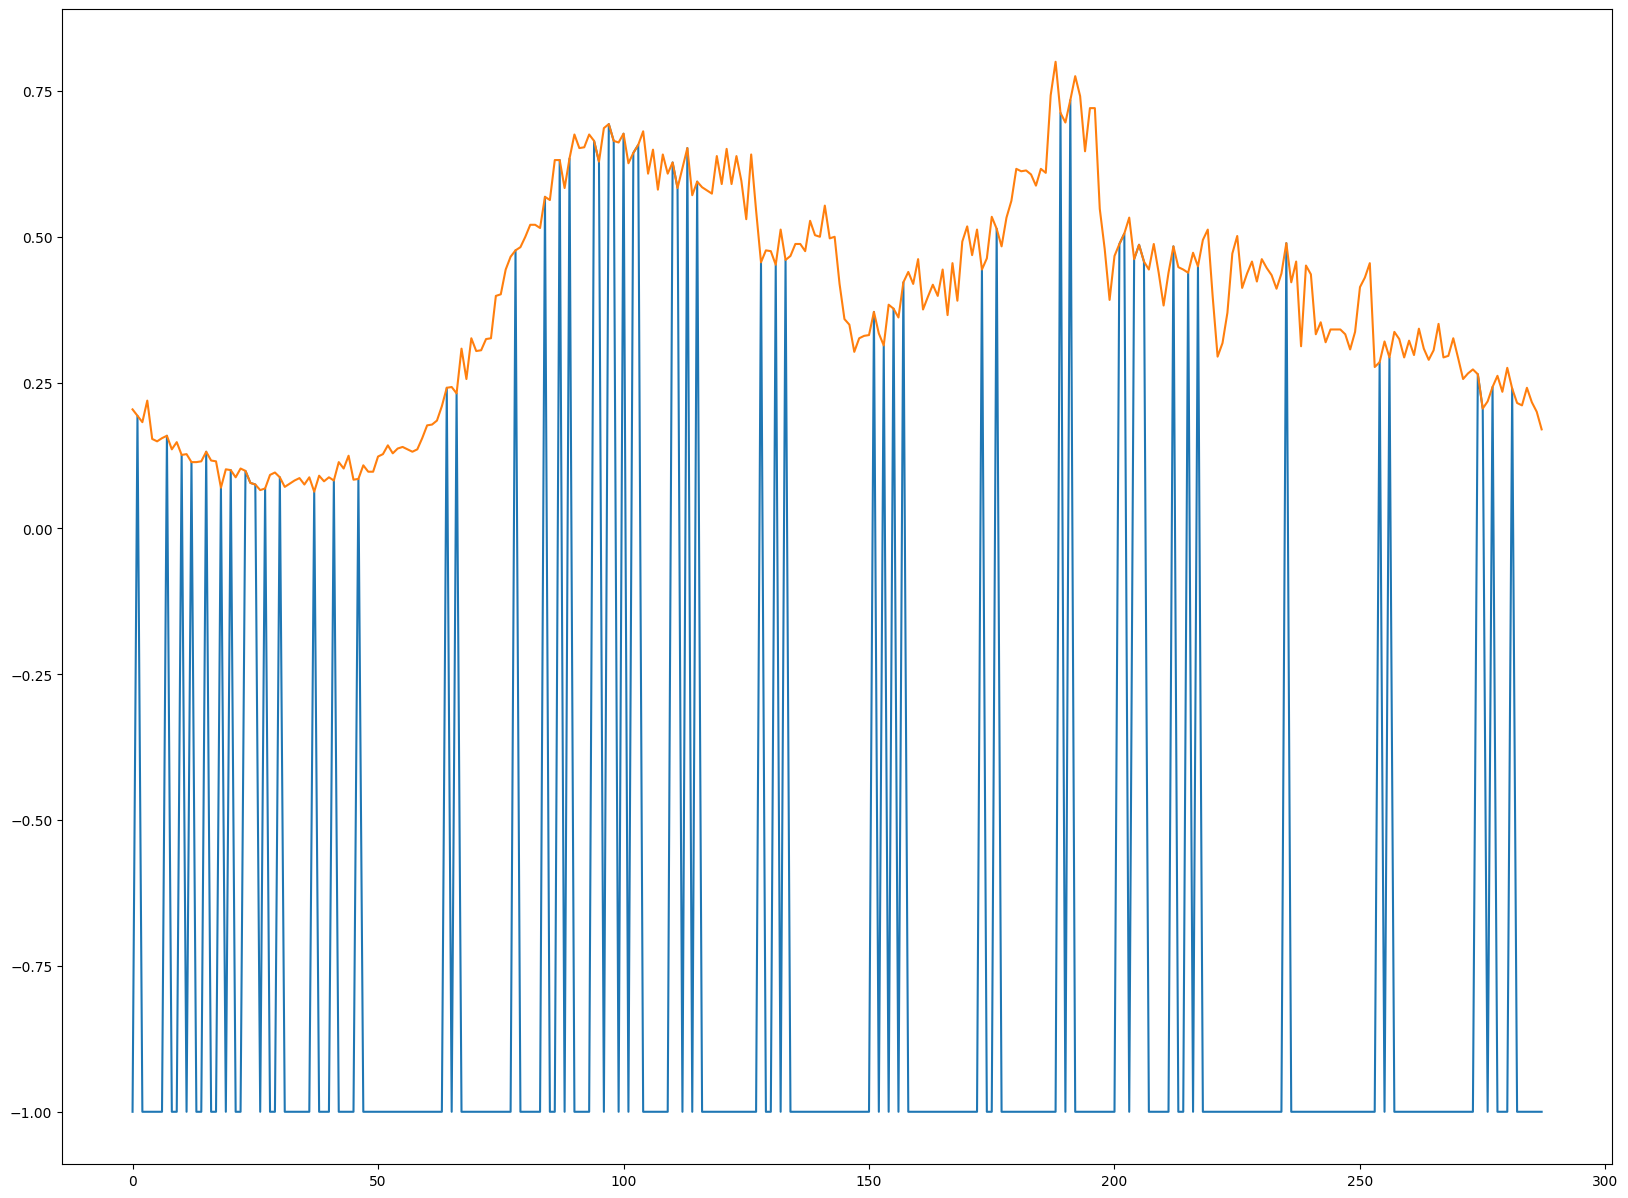

In [14]:
plt.figure(figsize=(20,15))
plt.plot(maskedccs)
plt.plot(ccs['Volume'].values)
plt.show()

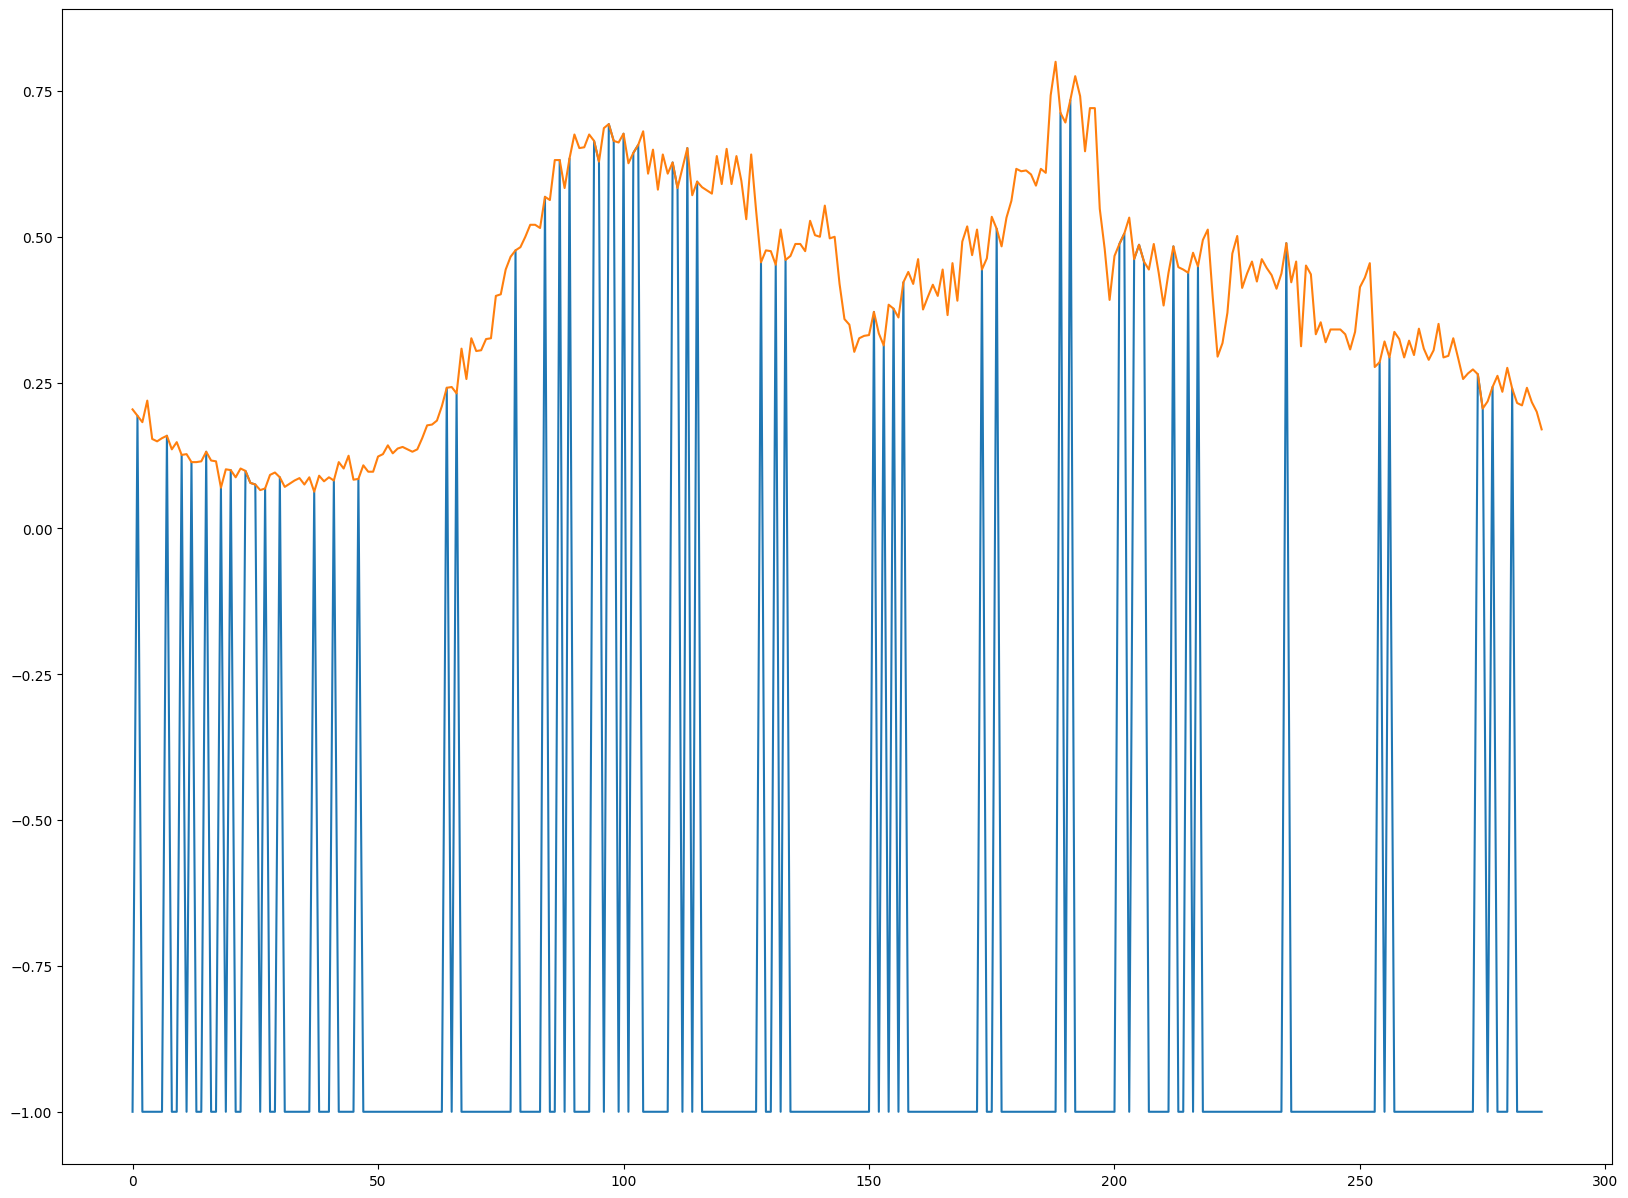

In [15]:
plt.figure(figsize=(20,15))
plt.plot(maskedccs)
plt.plot(ccs['Volume'].values)
plt.show()

## 3. Prepare data for training/test

In [16]:
from sklearn.model_selection import train_test_split

# Pad the daily data sequences to the same length
max_length = max(df_day.shape[0] for df_day in daily_ccs.values())
X = [torch.tensor(df_day['Volume'].values) for df_day in daily_ccs.values()]
X = torch.nn.utils.rnn.pad_sequence(X, batch_first=True, padding_value=0)

# Split the data into input and target data
X = X[:, :]
y = X[:, :]

# Split the daily data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [24]:
import numpy as np
import torch

def mask_data(data, pct_mask=0.3):
    # Set seed to ensure reproducibility
    np.random.seed(0)
    
    # # Select the appropriate dataframe based on the number of lanes
    # if lanes == 1:
    #     mask_df = one_lane_df
    # elif lanes == 2:
    #     mask_df = two_lane_df
    # elif lanes == 4:
    #     mask_df = four_lane_df
    # else:
    #     raise ValueError("Invalid number of lanes")
    
   # Create a mask for each hour based on the expected percentage of missing values
    mask = torch.ones((data.shape[0],24, data.shape[1]))
    for hour in range(24):
        missing_percent = mask_df.loc[mask_df['hour'] == hour, 'nan%'].values[0]
        mask[:,hour, :] = torch.from_numpy(np.random.binomial(1, 1-missing_percent, size=(data.shape[0], data.shape[1]))).float()
    
    # Apply the mask to the data
    masked_data = data * mask
    
    return masked_data


In [28]:
X_train_masked = mask_data(X_train, pct_mask=0.3)

In [30]:
X_test_masked = mask_data(X_test, pct_mask=0.35)

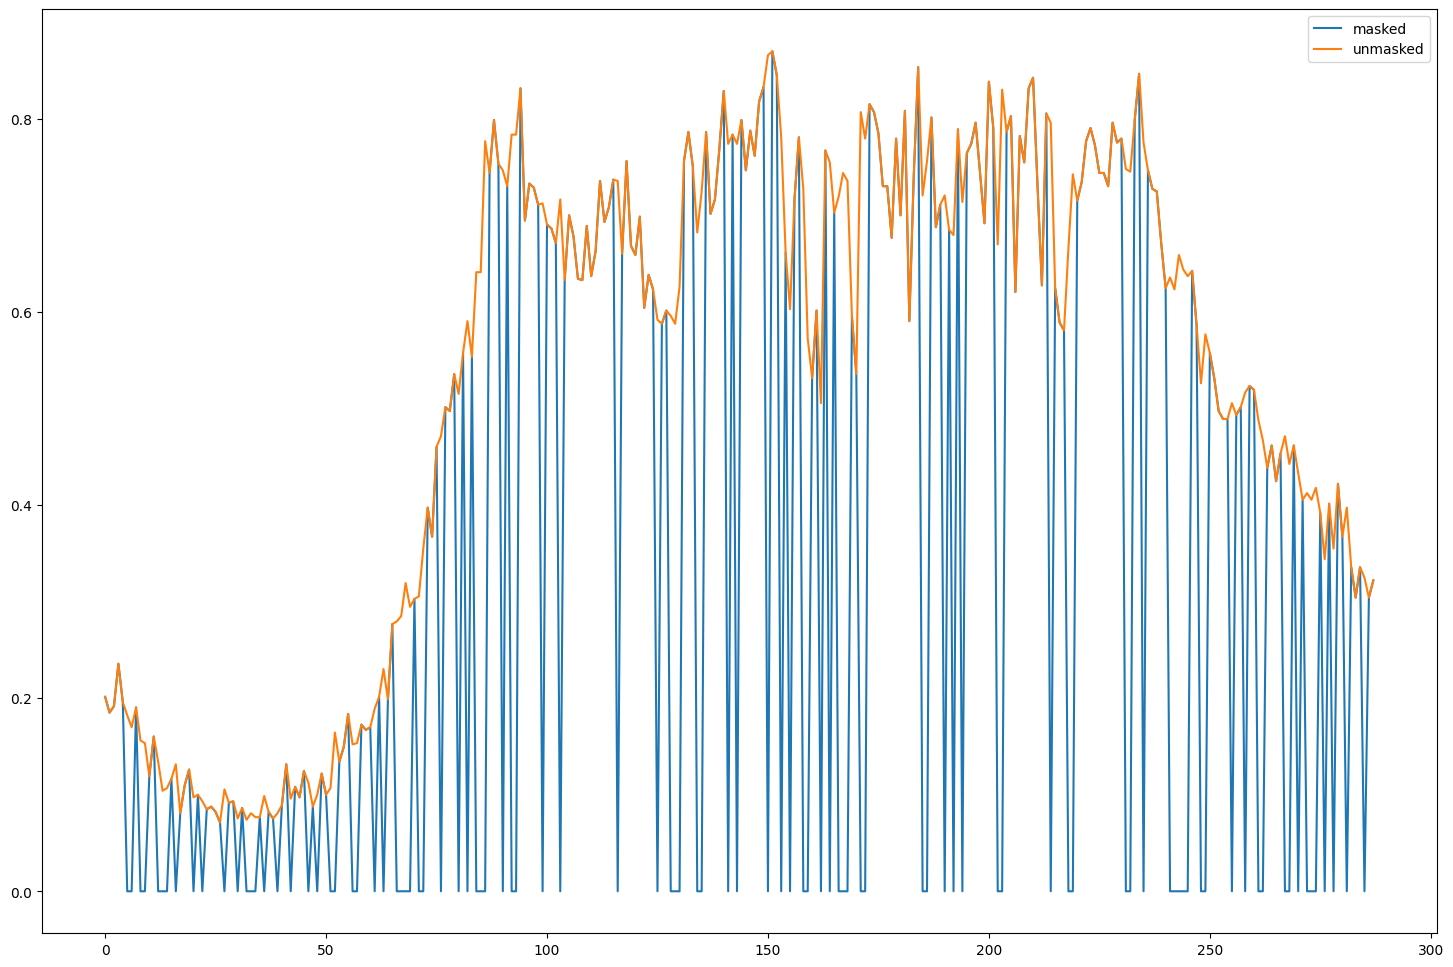

In [33]:
# Choose a random day from the training set
day_index = np.random.randint(X_train.shape[0])

# Get the masked and unmasked versions of the day
masked_day = X_train_masked[day_index]
unmasked_day = X_train[day_index]

# Plot the masked and unmasked versions of the day
plt.figure(figsize=(18, 12))
plt.plot(masked_day, label='masked')
plt.plot(unmasked_day, label='unmasked')
plt.legend()
plt.show()

In [110]:
print(X_train_masked.shape)
print(y_train.shape)

torch.Size([657, 288])
torch.Size([657, 288])


In [111]:
X_train

tensor([[0.0904, 0.0849, 0.0849,  ..., 0.1466, 0.1425, 0.1123],
        [0.2219, 0.2233, 0.2041,  ..., 0.2890, 0.2603, 0.2329],
        [0.1740, 0.1630, 0.1781,  ..., 0.2726, 0.1959, 0.2068],
        ...,
        [0.1493, 0.1849, 0.1274,  ..., 0.2603, 0.2082, 0.2082],
        [0.2959, 0.2507, 0.2808,  ..., 0.2247, 0.2137, 0.1658],
        [0.2836, 0.2493, 0.2575,  ..., 0.3041, 0.3233, 0.2808]],
       dtype=torch.float64)

In [112]:
X_train_masked

tensor([[0.0904, 0.0849, 0.0849,  ..., 0.0000, 0.1425, 0.1123],
        [0.2219, 0.0000, 0.2041,  ..., 0.2890, 0.2603, 0.2329],
        [0.1740, 0.1630, 0.1781,  ..., 0.2726, 0.1959, 0.2068],
        ...,
        [0.1493, 0.1849, 0.1274,  ..., 0.2603, 0.2082, 0.2082],
        [0.2959, 0.2507, 0.2808,  ..., 0.2247, 0.2137, 0.1658],
        [0.0000, 0.2493, 0.0000,  ..., 0.3041, 0.0000, 0.2808]],
       dtype=torch.float64)

In [113]:
y_train

tensor([[0.0904, 0.0849, 0.0849,  ..., 0.1466, 0.1425, 0.1123],
        [0.2219, 0.2233, 0.2041,  ..., 0.2890, 0.2603, 0.2329],
        [0.1740, 0.1630, 0.1781,  ..., 0.2726, 0.1959, 0.2068],
        ...,
        [0.1493, 0.1849, 0.1274,  ..., 0.2603, 0.2082, 0.2082],
        [0.2959, 0.2507, 0.2808,  ..., 0.2247, 0.2137, 0.1658],
        [0.2836, 0.2493, 0.2575,  ..., 0.3041, 0.3233, 0.2808]],
       dtype=torch.float64)

## 4. Define and build autoencoder

In [34]:
# Define the input dimensions and the number of dimensions of the lower-dimensional representation
input_dim = 288
encoding_dim = 144

### Linear Autoencoder

In [35]:
class Autoencoder(nn.Module):
  def __init__(self, input_dim, encoding_dim):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(input_dim, encoding_dim)
    self.relu = nn.ReLU()
    
    self.encoder_hidden = nn.Linear(encoding_dim, 32)
    self.relu2 = nn.ReLU()
    
    self.decoder_hidden = nn.Linear(32, encoding_dim)
    self.bn = nn.BatchNorm1d(encoding_dim)
    self.relu3 = nn.ReLU()
    
    self.decoder = nn.Linear(encoding_dim, input_dim)

  def forward(self, x):
    x = self.encoder(x)
    x = self.relu(x)
    
    x = self.encoder_hidden(x)
    x = self.relu2(x)
    
    x = self.decoder_hidden(x)
    x = self.bn(x)
    x = self.relu3(x)
    
    x = self.decoder(x)

    return x

### Convolutional Autoencoder 

In [36]:
class CAE(nn.Module):
    def __init__(self, input_channels, encoding_dim):
        super(CAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        
        self.encoder_hidden = nn.Linear(128*7*7, encoding_dim)
        self.relu2 = nn.ReLU()

        self.decoder_hidden = nn.Linear(encoding_dim, 128*7*7)
        self.bn = nn.BatchNorm1d(128*7*7)
        self.relu3 = nn.ReLU()

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, input_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.encoder_hidden(x)
        x = self.relu2(x)

        x = self.decoder_hidden(x)
        x = self.bn(x)
        x = self.relu3(x)

        x = x.view(x.size(0), 128, 7, 7)
        x = self.decoder(x)
        return x

In [37]:
#create model
autoencoder = Autoencoder(input_dim, encoding_dim)

In [38]:
# Loss func and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters())

### Training loop

In [39]:
train_losses = []
train_accuracies = []

# Define the number of epochs
num_epochs = 300

# Define the batch size
batch_size = 15

# Define a list of the daily data indices
day_indices = list(range(X_train.shape[0]))

# Train the autoencoder model
for epoch in range(num_epochs):
  # Shuffle the daily data indices
  np.random.shuffle(day_indices)
  
  # Loop over the daily data indices in batches
  for batch_start in range(0, len(day_indices), batch_size):
    # Get the batch indices
    batch_indices = day_indices[batch_start:batch_start+batch_size]

    # Get the input and target data for the current batch
    X_train_batch_masked = X_train_masked[batch_indices]
    y_train_batch = X_train[batch_indices]

    # Forward pass
    reconstruction = autoencoder(X_train_batch_masked.to(dtype=torch.float))
    loss = criterion(reconstruction, y_train_batch.to(dtype=torch.float))
    
    # Calculate the mean absolute error between the reconstructed time series and the label
    accuracy = 1 - torch.mean(torch.abs(reconstruction - y_train_batch.to(dtype=torch.float))).item()
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  # Append the loss and accuracy to the lists
  train_losses.append(loss.item())
  train_accuracies.append(accuracy)
  
  if (epoch+1) % 10 == 0:
    print(f'epoch [{epoch+1}/200], loss:{loss.item():.4f}, accuracy:{accuracy:.4f}')

epoch [10/200], loss:0.0108, accuracy:0.9204
epoch [20/200], loss:0.0063, accuracy:0.9437
epoch [30/200], loss:0.0047, accuracy:0.9507
epoch [40/200], loss:0.0049, accuracy:0.9510
epoch [50/200], loss:0.0084, accuracy:0.9300
epoch [60/200], loss:0.0044, accuracy:0.9524
epoch [70/200], loss:0.0030, accuracy:0.9614
epoch [80/200], loss:0.0051, accuracy:0.9481
epoch [90/200], loss:0.0046, accuracy:0.9526
epoch [100/200], loss:0.0028, accuracy:0.9621
epoch [110/200], loss:0.0029, accuracy:0.9621
epoch [120/200], loss:0.0032, accuracy:0.9592
epoch [130/200], loss:0.0034, accuracy:0.9590
epoch [140/200], loss:0.0033, accuracy:0.9581
epoch [150/200], loss:0.0030, accuracy:0.9606
epoch [160/200], loss:0.0030, accuracy:0.9593
epoch [170/200], loss:0.0046, accuracy:0.9503
epoch [180/200], loss:0.0031, accuracy:0.9600
epoch [190/200], loss:0.0026, accuracy:0.9640
epoch [200/200], loss:0.0025, accuracy:0.9652
epoch [210/200], loss:0.0021, accuracy:0.9669
epoch [220/200], loss:0.0024, accuracy:0.96

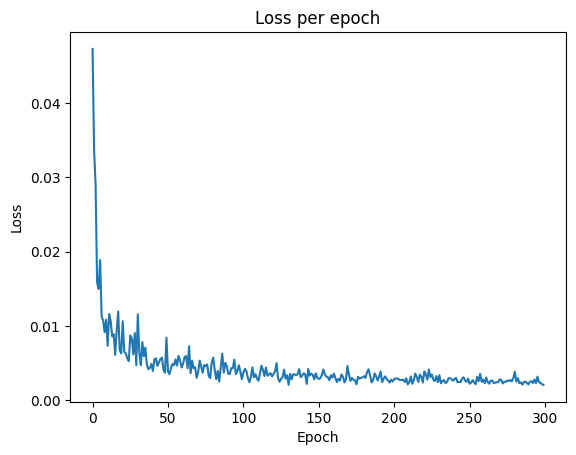

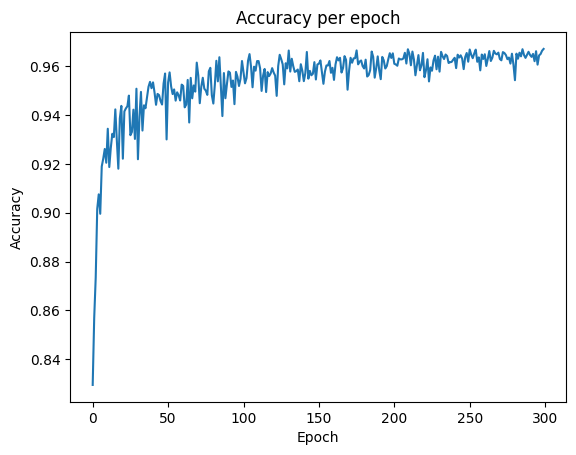

In [40]:
import matplotlib.pyplot as plt

# Plot the loss per epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.show()

# Plot the accuracy per epoch
plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per epoch')
plt.show()

### Test loop

In [44]:
test_losses = []
test_accuracies = []

# set model to eval
autoencoder.eval()

# Loop over the test data in batches
for batch_start in range(0, len(X_test), batch_size):
  # Get the batch indices
  batch_indices = range(batch_start, min(batch_start+batch_size, len(X_test)))

  # Get the input and target data for the current batch
  X_test_batch_masked = X_test_masked[batch_indices]
  y_test_batch = X_test[batch_indices]

  # Forward pass
  with torch.no_grad():
    reconstruction = autoencoder(X_test_batch_masked.to(dtype=torch.float))
    loss = criterion(reconstruction, y_test_batch.to(dtype=torch.float))
  
  # Calculate the accuracy between the reconstructed time series and the label
  test_accuracy = 1 - torch.mean(torch.abs(reconstruction - y_test_batch.to(dtype=torch.float))).item()

  # Append the loss and accuracy to the lists
  test_losses.append(loss.item())
  test_accuracies.append(test_accuracy)

# Calculate the mean loss and accuracy over all test batches
mean_test_loss = np.mean(test_losses)
mean_test_accuracy = np.mean(test_accuracies)

# Print the test loss and accuracy
print(f'test loss: {test_loss:.4f}, test accuracy: {test_accuracy:.4f}')

TypeError: unsupported format string passed to list.__format__

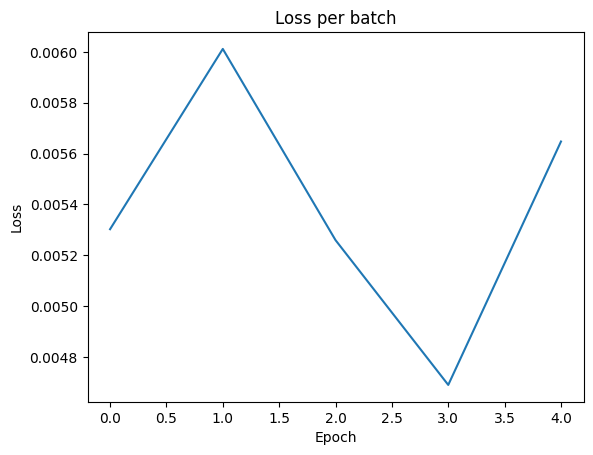

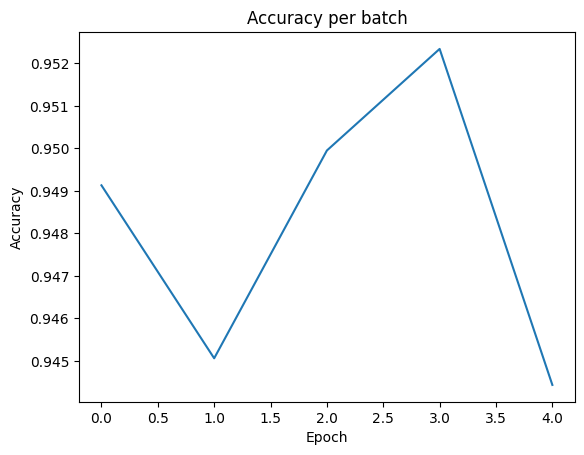

In [45]:
# Plot the loss per epoch
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per batch')
plt.show()

# Plot the accuracy per epoch
plt.plot(test_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per batch')
plt.show()

## 5. Testing with other sets of CCS data (site 029-0178)

In [43]:
def get_daily_data(file_path):
  # Read the CSV file into a dataframe
  ccs = pd.read_csv(file_path, parse_dates=["Time"], low_memory=False)

  # Select the 'Time', 'Direction', and 'Volume' columns
  ccs = ccs[['Time','Direction', 'Volume']]

  # Select the rows with 'Direction' equal to 'S'
  ccs = ccs.loc[ccs['Direction']=='E']

  # Normalize the 'Volume' column
  scaler = preprocessing.MinMaxScaler()
  ccs['Volume'] = scaler.fit_transform(ccs[['Volume']])

  # Convert the 'Time' column to a datetime index
  ccs.index = pd.to_datetime(ccs['Time'])

  # Initialize a dictionary to store the daily data
  daily_ccs = {}

  # Extract the unique dates from the datetime index
  dates = np.unique(ccs.index.date)

  # Extract the daily readings using a loop
  for date in dates:
    daily_ccs[date] = ccs[ccs.index.date == date]

  # Return the dictionary of daily data
  return daily_ccs

In [156]:
# Define the file path
file_path = r'D:\OneDrive - University of Georgia/CCS_Data/Directional/029-0178.csv'

# Call the function to get the daily data
daily_ccs = get_daily_data(file_path)

# Check the number of rows in each daily dataframe
for date, df_day in daily_ccs.items():
  print(f'{date}: {df_day.shape[0]} rows')

2018-08-01: 288 rows
2018-08-02: 288 rows
2018-08-03: 288 rows
2018-08-04: 288 rows
2018-08-05: 288 rows
2018-08-06: 288 rows
2018-08-07: 288 rows
2018-08-08: 288 rows
2018-08-09: 288 rows
2018-08-10: 288 rows
2018-08-11: 288 rows
2018-08-12: 288 rows
2018-08-13: 288 rows
2018-08-14: 288 rows
2018-08-15: 288 rows
2018-08-16: 288 rows
2018-08-17: 288 rows
2018-08-18: 288 rows
2018-08-19: 288 rows
2018-08-20: 288 rows
2018-08-21: 288 rows
2018-08-22: 288 rows
2018-08-23: 288 rows
2018-08-24: 288 rows
2018-08-25: 288 rows
2018-08-26: 288 rows
2018-08-27: 288 rows
2018-08-28: 288 rows
2018-08-29: 288 rows
2018-08-30: 288 rows
2018-08-31: 288 rows
2018-09-01: 288 rows
2018-09-02: 288 rows
2018-09-03: 288 rows
2018-09-04: 288 rows
2018-09-05: 288 rows
2018-09-06: 288 rows
2018-09-07: 288 rows
2018-09-08: 288 rows
2018-09-09: 288 rows
2018-09-10: 288 rows
2018-09-11: 288 rows
2018-09-12: 288 rows
2018-09-13: 288 rows
2018-09-14: 288 rows
2018-09-15: 288 rows
2018-09-16: 288 rows
2018-09-17: 2

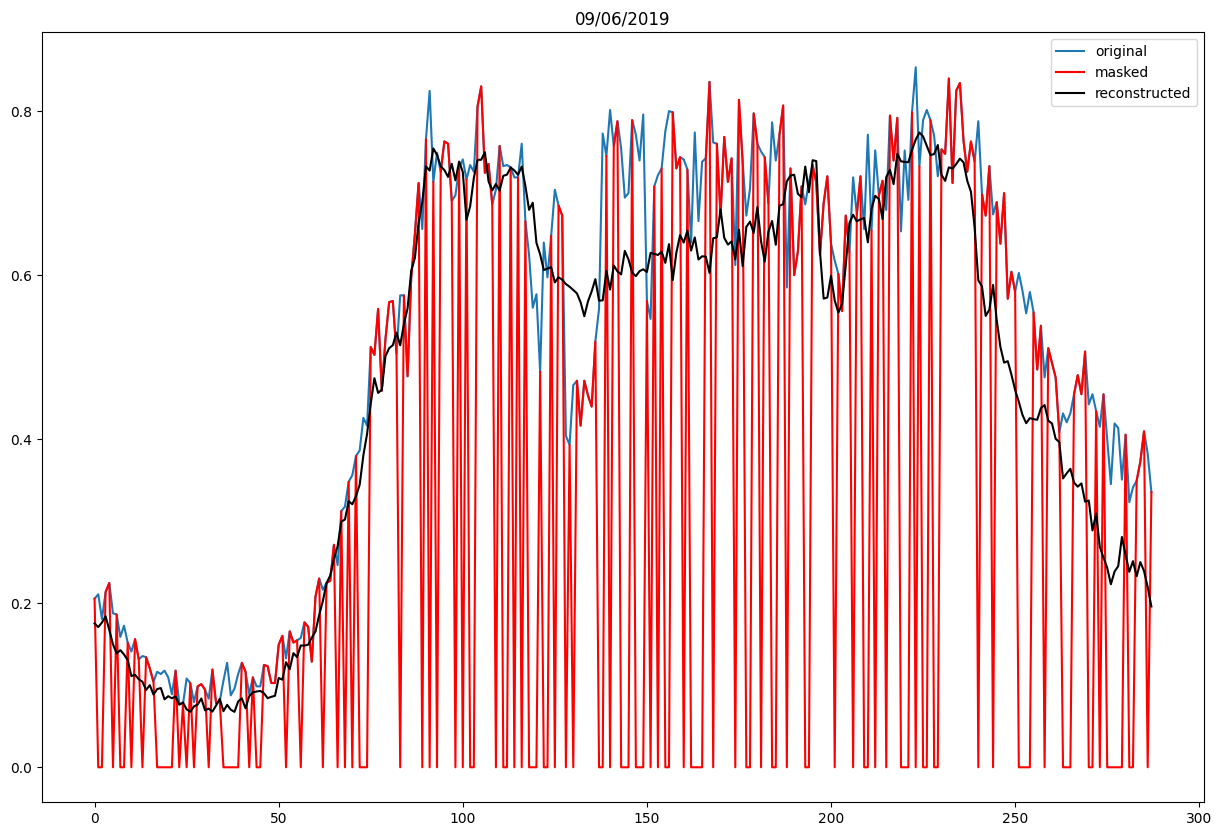

In [50]:
# Select a sample from the daily data dictionary
sample_date = list(daily_ccs.keys())[400]
X_sample = daily_ccs[sample_date]['Volume'].values

# Convert the sample to a tensor
X_sample = torch.tensor(X_sample).view(1, -1)

# Mask the sample
pct_masked = 0.4
X_sample_masked = mask_data(X_sample, pct_masked)

# Forward pass to get the reconstruction
reconstruction = autoencoder(X_sample_masked.to(dtype=torch.float))

# Convert the reconstruction back to a numpy array
reconstruction = reconstruction.detach().numpy()[0]

# Plot the original and reconstructed time series
plt.figure(figsize=(15,10))
plt.plot(X_sample.numpy()[0], label='original')
plt.plot(X_sample_masked.numpy()[0], 'r', label='masked')
plt.plot(reconstruction, 'k', label='reconstructed')
plt.title(sample_date.strftime("%m/%d/%Y"))
plt.legend()
plt.show()


In [ ]:
def mask_time_series(data_path, mask_start, mask_end, day_of_week=None, hour_of_day=None, num_lanes=None):
    # load the time series data into a pandas DataFrame
    df = pd.read_csv(data_path)

    # create new columns for the day of the week, hour of the day, and number of lanes
    df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.dayofweek
    df['hour_of_day'] = pd.to_datetime(df['timestamp']).dt.hour
    df['num_lanes'] = ...

    # create a mask for the sequence
    mask = ((df['timestamp'] >= mask_start) & (df['timestamp'] <= mask_end))

    # get the mean count of NaN values for the site grouped by day of the week, hour of the day, and number of lanes
    daily_mean_by_dow = df.groupby('day_of_week')['num_nans'].mean()
    hourly_mean_by_hour = df.groupby('hour_of_day')['num_nans'].mean()
    hourly_mean_by_lanes = df.groupby('num_lanes')['num_nans'].mean()

    # generate random numbers for each time stamp
    random_numbers = np.random.rand(len(df))

    # set the values to NaN if the random number is less than or equal to the mean count of NaN values for the corresponding time stamp
    if day_of_week is not None and hour_of_day is not None and num_lanes is not None:
        df.loc[mask & (df['day_of_week'] == day_of_week) & (df['hour_of_day'] == hour_of_day) & (df['num_lanes'] == num_lanes) & (random_numbers <= daily_mean_by_dow[day_of_week]) & (random_numbers <= hourly_mean_by_hour[hour_of_day]) & (random_numbers <= hourly_mean_by_lanes[num_lanes]), 'traffic_volume'] = np.nan
    elif day_of_week is not None and hour_of_day is not None:
        df.loc[mask & (df['day_of_week'] == day_of_week) & (df['hour_of_day'] == hour_of_day) & (random_numbers <= daily_mean_by_dow[day_of_week]) & (random_numbers <= hourly_mean_by_hour[hour_of_day]), 'traffic_volume'] = np.nan
    elif day_of_week is not None and num_lanes is not None:
        df.loc[mask & (df['day_of_week'] == day_of_week) & (df['num_lanes'] == num_lanes) & (random_numbers <= daily_mean_by_dow[day_of_week]) & (random_numbers <= hourly_mean_by_lanes[num_lanes]), 'traffic_volume'] = np.nan
    elif hour_of_day is not None and num_lanes is not None:
        df.loc[mask & (df['hour_of_day'] == hour_of_day) & (df['num_lanes'] == num_lanes) & (random_numbers <= hourly_mean_by_hour[hour_of_day]) & (random_numbers <= hourly_mean_by_lanes[num_lanes]), 'traffic_volume'] = np.nan
    elif day_of_week is not None:
        df.loc[mask & (df['day_of_week'] == day_of_week) & (random_numbers <= daily_mean_by_dow[day_of_week]), 'traffic_volume'] = np.nan
    elif hour_of_day is not None:
        df.loc[mask & (df['hour_of_day'] == hour_of_day) & (random_numbers <= hourly
